In [1]:
import cv2
import numpy as np
from scipy import cluster
from matplotlib import pyplot
import math

In [152]:
X = np.array([
        [5.9, 3.2], 
        [4.6, 2.9], 
        [6.2, 2.8], 
        [4.7, 3.2], 
        [5.5, 4.2], 
        [5.0, 3.0], 
        [4.9, 3.1], 
        [6.7, 3.1], 
        [5.1, 3.8], 
        [6.0, 3.0]])




# pyplot.scatter(X[:,0], X[:,1], marker= "^")
# pyplot.scatter(mu[:,0], mu[:,1], c= mu_c)
# pyplot.show()

In [153]:
def measure_euclidean_distance(pt1 , pt2):
    dis = math.sqrt(((pt1[0] - pt2[0])**2) + ((pt1[1] - pt2[1])**2))
    return dis

In [154]:
def calculate_distances_from_centroids(mu):
    cluster_c = []

    for pt in X:

        isFirst = True
        for m, mc in zip(mu,mu_c):
            if isFirst == True:
                d = measure_euclidean_distance(pt,m)
                c = mc
                isFirst = False
            elif (measure_euclidean_distance(pt,m) < d):
                d = measure_euclidean_distance(pt,m)
                c = mc

        cluster_c.append(c) 

    pyplot.scatter(X[:,0], X[:,1], marker= "^", c= cluster_c)
    pyplot.scatter(mu[:,0], mu[:,1], c= mu_c)
    pyplot.show()
    
    return np.asarray(cluster_c)

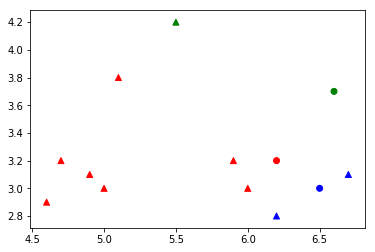

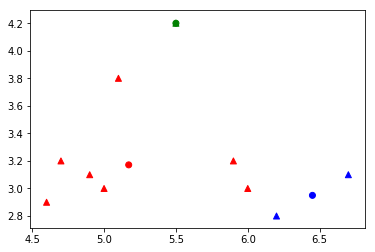

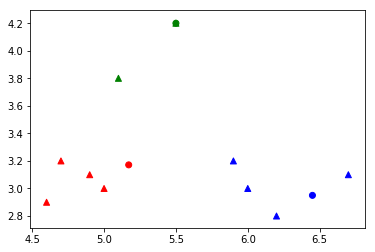

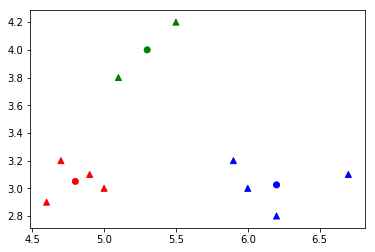

In [155]:
mu = np.array([[6.2, 3.2], [6.6, 3.7], [6.5, 3.0]])
mu_c = ['r','g','b']

for i in range(2):
    
    cluster_c = calculate_distances_from_centroids(mu)

    clusters = []
    for mc in zip(mu_c):
        clusters.append(X[cluster_c == mc])

    mu = []
    for clus in clusters:
        mu.append(np.mean(clus, axis=0))

    mu = np.asarray(mu)



    pyplot.scatter(X[:,0], X[:,1], marker= "^", c= cluster_c)
    pyplot.scatter(mu[:,0], mu[:,1], c= mu_c)
    pyplot.show()

    



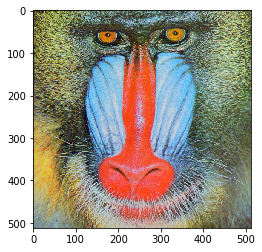

In [3]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

k = 5

def printPic(img):
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()
    

image = cv2.imread("/Users/amlan/Documents/codebase/github/UB_Courses/CSE_573_Computer_Vision/Project_2/data/baboon.jpg")
# print(image)
printPic(image)
# print(image)

In [18]:
def measure_euclidean_distance_3d(color1 , color2):
#     dis = math.sqrt(((color1[0] - color2[0])**2) + ((color1[1] - color2[1])**2) + ((color1[2] - color2[2])**2))
    dis = ((color1[0] - color2[0])**2) + ((color1[1] - color2[1])**2) + ((color1[2] - color2[2])**2)
    return dis

In [34]:
def calculate_distances_from_centroids_3d(mu):
    cluster_c = np.zeros([image.shape[0],image.shape[1]])

    h, w, l = image.shape
    
    
    for i in range(h):
        for j in range(w):
            pixel = image[i][j]
#             print(pixel)

            isFirst = True
            for m, mc in zip(mu,mu_c):
                if isFirst == True:
                    d = measure_euclidean_distance_3d(pixel,m)
                    c = mc
                    isFirst = False
                elif (measure_euclidean_distance_3d(pixel,m) < d):
                    d = measure_euclidean_distance_3d(pixel,m)
                    c = mc

            cluster_c[i][j] = c 

    
    return np.asarray(cluster_c)

In [35]:

# mu = np.random.randint(0,255, size=(k, 3))
# mu_c = np.arange(k)

# for i in range(1):
    
#     cluster_c = calculate_distances_from_centroids_3d(mu)
# #     print(np.max(cluster_c))

#     clusters = []
#     for mc in zip(mu_c):
#         clusters.append(image[cluster_c == mc])

#     mu = []
#     for clus in clusters:
#         mu.append(np.mean(clus, axis=0))

#     mu = np.asarray(mu)



In [36]:

mu = np.random.randint(0,255, size=(k, 3))
mu_c = np.arange(k)


    
cluster_c = calculate_distances_from_centroids_3d(mu)
#     print(np.max(cluster_c))



In [37]:
cluster_c

array([[2., 1., 1., ..., 2., 2., 0.],
       [2., 2., 1., ..., 2., 2., 2.],
       [1., 2., 1., ..., 2., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 2., 1.],
       [0., 0., 2., ..., 4., 4., 4.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [38]:
h, w, l = image.shape
clusters = []


for mc in zip(mu_c):
    clustered_img_np = []
    for i in range(h):
        for j in range(w):
            if(cluster_c[i][j] == mc):
                clustered_img_np.append(image[i][j])
    clusters.append(np.asarray(clustered_img_np))
    


In [40]:
mu = []
for clus in clusters:
    mu.append(np.mean(clus, axis=0))

mu = np.asarray(mu)

In [42]:
mu

array([[179.6299945 , 182.03955158, 156.77224987],
       [ 50.1302576 ,  70.07775953,  67.31627752],
       [ 90.04243441, 121.78016565, 131.21297479],
       [ 78.51737959, 100.73802347, 228.21785417],
       [114.65774296,  96.84686236,  71.51777567]])

In [57]:

h, w, l = image.shape
output_img = np.zeros([h,w,l])

for i in range(h):
    for j in range(w):
        index =int(cluster_c[i][j])
#         print(mu[index])
        output_img[i][j] = mu[index]
            




In [58]:
prin

array([[[ 90.04243441, 121.78016565, 131.21297479],
        [ 50.1302576 ,  70.07775953,  67.31627752],
        [ 50.1302576 ,  70.07775953,  67.31627752],
        ...,
        [ 90.04243441, 121.78016565, 131.21297479],
        [ 90.04243441, 121.78016565, 131.21297479],
        [179.6299945 , 182.03955158, 156.77224987]],

       [[ 90.04243441, 121.78016565, 131.21297479],
        [ 90.04243441, 121.78016565, 131.21297479],
        [ 50.1302576 ,  70.07775953,  67.31627752],
        ...,
        [ 90.04243441, 121.78016565, 131.21297479],
        [ 90.04243441, 121.78016565, 131.21297479],
        [ 90.04243441, 121.78016565, 131.21297479]],

       [[ 50.1302576 ,  70.07775953,  67.31627752],
        [ 90.04243441, 121.78016565, 131.21297479],
        [ 50.1302576 ,  70.07775953,  67.31627752],
        ...,
        [ 90.04243441, 121.78016565, 131.21297479],
        [ 50.1302576 ,  70.07775953,  67.31627752],
        [ 50.1302576 ,  70.07775953,  67.31627752]],

       ...,

      

In [67]:
op = output_img.astype(int)
print(np.max(op))
# printPic(op)

# cv_rgb = cv2.cvtColor(op, cv2.COLOR_BGR2RGB)
# plt.imshow(cv_rgb)
# plt.show()


cv2.imwrite('abc.jpg',op)


	

228


True